In [326]:
import pandas as pd
import  matplotlib.pyplot as plt
import folium
#plt.set_option('display.mpl_style', 'default')

In [327]:
%matplotlib inline

In [328]:
ccdata = pd.read_csv('consumer_complains.csv', engine="python")

In [329]:
#population data credits: http://www.census.gov/2010census/data/ 
popn_data = pd.read_csv('pop_density_us.csv', engine="python")

In [331]:
popn_data.head()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,# DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# DENSITY RANKING EXPRESSED IN ORDER OF MOST D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
3,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29


In [332]:
popn_data.tail()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
51,Washington,1141990,1356621,1563396,1736191,2378963,2853214,3409169,4132156,4866692,...,37,37,37,35,32,30,30,30,27,27
52,West Virginia,1221119,1463701,1729205,1901974,2005552,1860421,1744237,1949644,1793477,...,15,15,15,15,22,27,27,28,31,31
53,Wisconsin,2333860,2632067,2939006,3137587,3434575,3951777,4417731,4705767,4891769,...,24,22,22,23,25,24,26,26,26,25
54,Wyoming,145965,194402,225565,250742,290529,330066,332416,469557,453588,...,50,50,50,50,50,51,51,51,51,51
55,Puerto Rico,1118012,1299809,1543913,1869255,2210703,2349544,2712033,3196520,3522037,...,5,5,5,2,4,4,3,3,3,3


In [333]:
# headers start on the 3rd column, so re-read, and use data on 
popn_data = pd.read_csv('pop_density_us.csv', engine="python", header=3)

In [334]:
popn_data.columns.values

array(['STATE_OR_REGION', '1910_POPULATION', '1920_POPULATION',
       '1930_POPULATION', '1940_POPULATION', '1950_POPULATION',
       '1960_POPULATION', '1970_POPULATION', '1980_POPULATION',
       '1990_POPULATION', '2000_POPULATION', '2010_POPULATION',
       '1910_DENSITY', '1920_DENSITY', '1930_DENSITY', '1940_DENSITY',
       '1950_DENSITY', '1960_DENSITY', '1970_DENSITY', '1980_DENSITY',
       '1990_DENSITY', '2000_DENSITY', '2010_DENSITY', '1910_RANK',
       '1920_RANK', '1930_RANK', '1940_RANK', '1950_RANK', '1960_RANK',
       '1970_RANK', '1980_RANK', '1990_RANK', '2000_RANK', '2010_RANK'], dtype=object)

In [335]:
# using the most recent census data (2010_POPULATION)
popn_data.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


In [336]:
popn_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52],
           dtype='int64')

In [337]:
popn_data.index = popn_data.STATE_OR_REGION

In [338]:
pop2010 = popn_data.loc[:,['STATE_OR_REGION','2010_POPULATION']] # STATE_OR_REGION  COUNT
pop2010.columns = ['STATE_OR_REGION','POPULATION']

In [339]:
ccdata.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN


In [340]:
ccdata2 = ccdata.loc[:,['State']]
ccdata2.fillna('Unspecified', inplace=True)
ccdata_counts = ccdata2.State.value_counts()

In [341]:
#state_names
state_names = pd.read_csv('state_table.csv', engine="python")

In [342]:
state_names.head(3)

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1,Ala.,IV,3,South,6,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2,Alaska,X,4,West,9,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4,Ariz.,IX,4,West,8,Mountain,9


In [343]:
state_names = state_names.loc[:,['name','abbreviation']]
state_names.index = state_names['abbreviation']

In [344]:
def density(value1, value2):
    return round(value1/value2, 2)

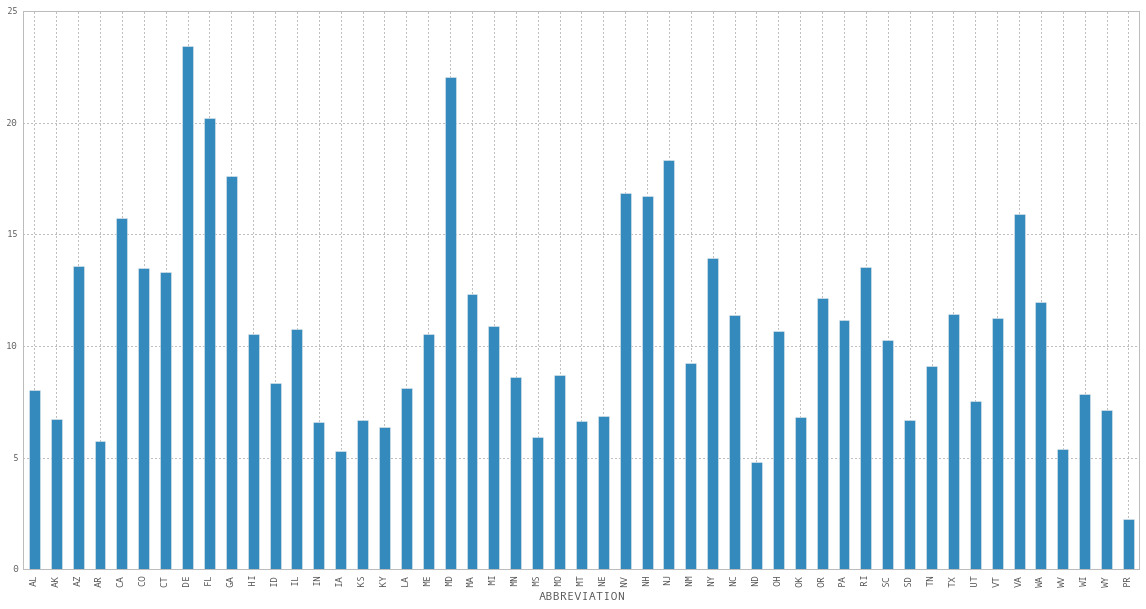

In [345]:
import math
#popn2010 state_or_region pop (fullname, number)
#ccdata_counts state_name count (abbr, number)
#state_names fullname abbreviation
concatenated = pd.concat([state_names, ccdata_counts], axis=1, join='inner')
concatenated.columns = ['STATE', 'ABBREVIATION', 'COMPLAINS COUNTS']
concatenated.index = concatenated['STATE']
concatenated = pd.concat([concatenated, pop2010], axis=1, join='inner')
concatenated.index = concatenated['ABBREVIATION']
(concatenated['COMPLAINS COUNTS']*10000 / concatenated['POPULATION'].astype(float)).plot(kind='bar', 
                                                                                        figsize=(20,10))

In [346]:
concatenated['per_capita'] = concatenated['COMPLAINS COUNTS']*10000 / concatenated['POPULATION'].astype(float)
concatenated.to_csv('per_capita_data.csv')

In [347]:
#concatenated = concatenated.loc[:,['ABBREVIATION','per_capita']]
#concatenated.plot(kind='bar', colormap='cubehelix', figsize=(20,10))
#concatenated.head()
#http://bit.ly/ccweek7code
from IPython.display import HTML


def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [325]:
map = folium.Map(location=[48, -102], zoom_start=3)
map.geo_json(geo_path='maped-us-states.json', data=concatenated,
             columns=['ABBREVIATION', 'per_capita'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Complaints Per Capita')
#map.create_map(path='us_states.html')
embed_map(map,'us_states.html')